# Differential Expression on GTEx dataset

### Set instance and token

In [2]:
import os, time
import pandas as pd
import matplotlib.pyplot as plt
import integration_curator # Genestack client library

os.environ['PRED_SPOT_HOST'] = '<host>'
os.environ['PRED_SPOT_TOKEN'] = '<token>'
os.environ['PRED_SPOT_VERSION'] = 'default-released'

omics_api = integration_curator.OmicsQueriesApi()

### Get samples

In [3]:
study_filter = 'genestack:accession=GSF014748'

start = time.time()
data = omics_api.search_samples(
    study_filter=study_filter, 
    page_limit=20000
)
samples = pd.DataFrame.from_dict([item['metadata'] for item in data.data])
print('Time to get %s samples: %i seconds\n' % (samples.shape[0], time.time()-start))

samples.head()

Time to get 14147 samples: 7 seconds



,genestack:accession,Sample Source ID,Sample Name,Organism,Sex,Disease,Age,Age Unit,Tissue,Cell Type,...,Harvest Location,Donor Treatment/Treatment Name,Specimen Type,Donor Disease,Sample Source,Donor Treatment - Treatment Name,Sample Type,GTEX original SMTS,Specimen Treatment - Treatment Name,groupId
0,GSF014751,GTEX-1117F-0003-SM-6WBT7,None,None,Female,Spinal Muscular Atrophy,None,None,None,None,...,Whole Blood,,Transfer To Matrix (Manual),Healthy,Arvados,Unknown,RNA,Blood,Untreated,GSF014749
1,GSF014752,GTEX-1117F-0226-SM-5GZZ7,None,None,Female,Spinal Muscular Atrophy,None,None,None,None,...,Skin of leg,,RNA Extraction from Paxgene-derived Lysate Pla...,Healthy,Arvados,Unknown,RNA,Adipose Tissue,Untreated,GSF014749
2,GSF014753,GTEX-1117F-0426-SM-5EGHI,None,None,Female,Spinal Muscular Atrophy,None,None,None,None,...,Gastrocnemius muscle,,RNA Extraction from Paxgene-derived Lysate Pla...,Healthy,Arvados,Unknown,RNA,Muscle,Untreated,GSF014749
3,GSF014754,GTEX-1117F-0526-SM-5EGHJ,None,None,Female,Spinal Muscular Atrophy,None,None,None,None,...,Left tibial,,RNA Extraction from Paxgene-derived Lysate Pla...,Healthy,Arvados,Unknown,RNA,Blood Vessel,Untreated,GSF014749
4,GSF014755,GTEX-1117F-0626-SM-5N9CS,None,None,Female,Spinal Muscular Atrophy,None,None,None,None,...,Coronary Artery,,RNA Extraction from Paxgene-derived Lysate Pla...,Healthy,Arvados,Unknown,RNA,Blood Vessel,Untreated,GSF014749


### Get expression data

In [4]:
gene = 'ENSG00000000003.10'
ex_query = 'Gene=%s MinValue=0.0' % gene

start = time.time()
data = omics_api.search_expression_data(
    study_filter=study_filter,
    ex_query=ex_query,
    page_limit=20000
)
expressions = pd.DataFrame.from_dict({'genestack:accession': item['relationships']['sample'], 
                                      'expression': item['expression']} for item in data.data)
print('Time to get %s expression values: %i seconds\n' % (expressions.shape[0], time.time()-start))

expressions.head()

Time to get 11688 expression values: 8 seconds



,genestack:accession,expression
0,GSF014752,2222.0
1,GSF014782,1656.0
2,GSF014788,1482.0
3,GSF014812,1876.0
4,GSF014841,3501.0


### Differential expression plot

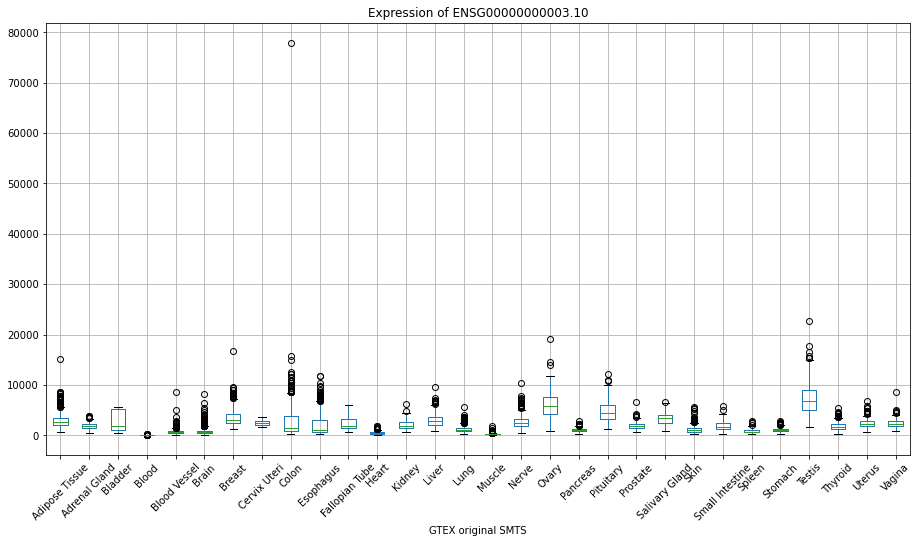

In [5]:
samples_expressions = pd.merge(samples, expressions)
samples_expressions.boxplot('expression', 'GTEX original SMTS', rot=45, figsize=(15,8))
plt.title('Expression of %s' % gene)
x = plt.suptitle('')